In [14]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data

In [34]:
x_test_raw = x_test

In [3]:
x_train[x_train < 127] = 0
x_train[x_train >= 127] = 1

x_test[x_test < 127] = 0
x_test[x_test >= 127] = 1

In [4]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [5]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Define Model

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))

Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model

In [11]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0160 - accuracy: 0.9956
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0123 - accuracy: 0.9964
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0104 - accuracy: 0.9967
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0085 - accuracy: 0.9974
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0062 - accuracy: 0.9983


In [16]:
metrics = history.history
loss_list = metrics['loss']
accuracy_list = metrics['accuracy']

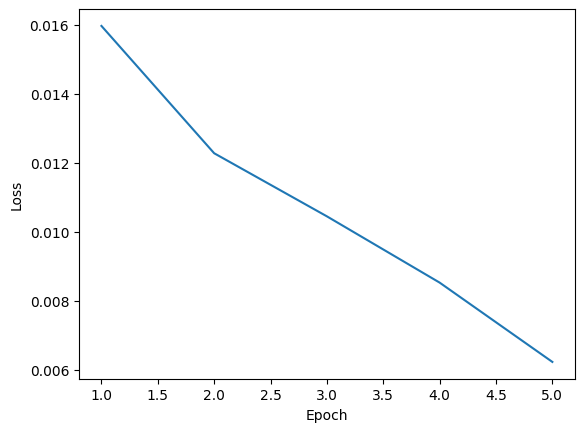

In [22]:
x = np.arange(1, 6, 1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, loss_list)

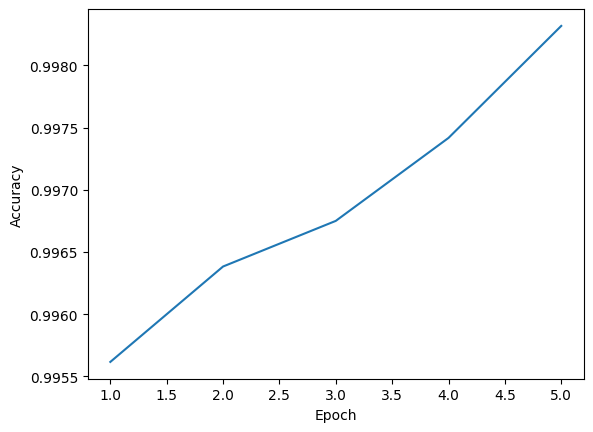

In [23]:
x = np.arange(1, 6, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, accuracy_list)

# Evaluate model

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0761 - accuracy: 0.9759


[0.07610984146595001, 0.9758999943733215]

# Predict

In [27]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


7


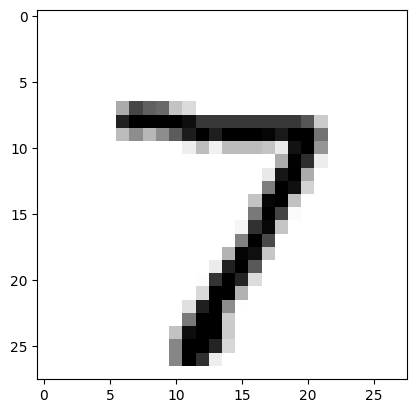

In [37]:
plt.imshow(x_test_raw[0], cmap='gray_r')
print(np.argmax(y_pred[0]))

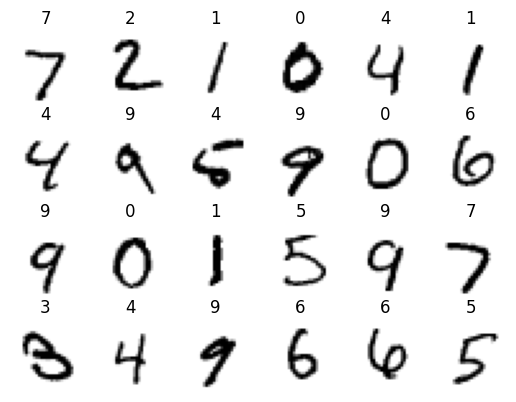

In [40]:
_, axes = plt.subplots(4, 6)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_raw[i], cmap='gray_r')
    ax.set_title(np.argmax(y_pred[i]))
    ax.set_axis_off()